In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = 'C:/Users/Delta.MSI/Downloads/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass




In [5]:
import pandas as pd

# Save X_train as CSV
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
X_train_df.to_csv('X_train.csv', index=False)


In [6]:
np.savetxt('ecg_sample.csv', X_train[0], delimiter=',')

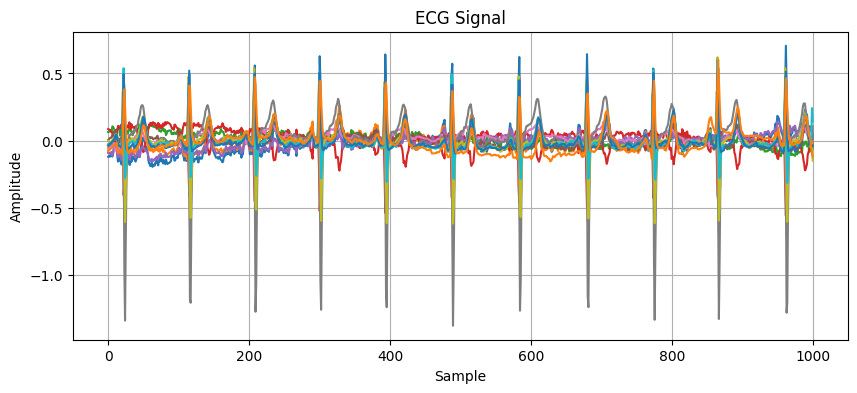

In [3]:
import matplotlib.pyplot as plt

# Select a sample
sample_index = 0  # Change this index to plot different samples
ecg_sample = X_train[sample_index]

# Plot ECG signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_sample)
plt.title('ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



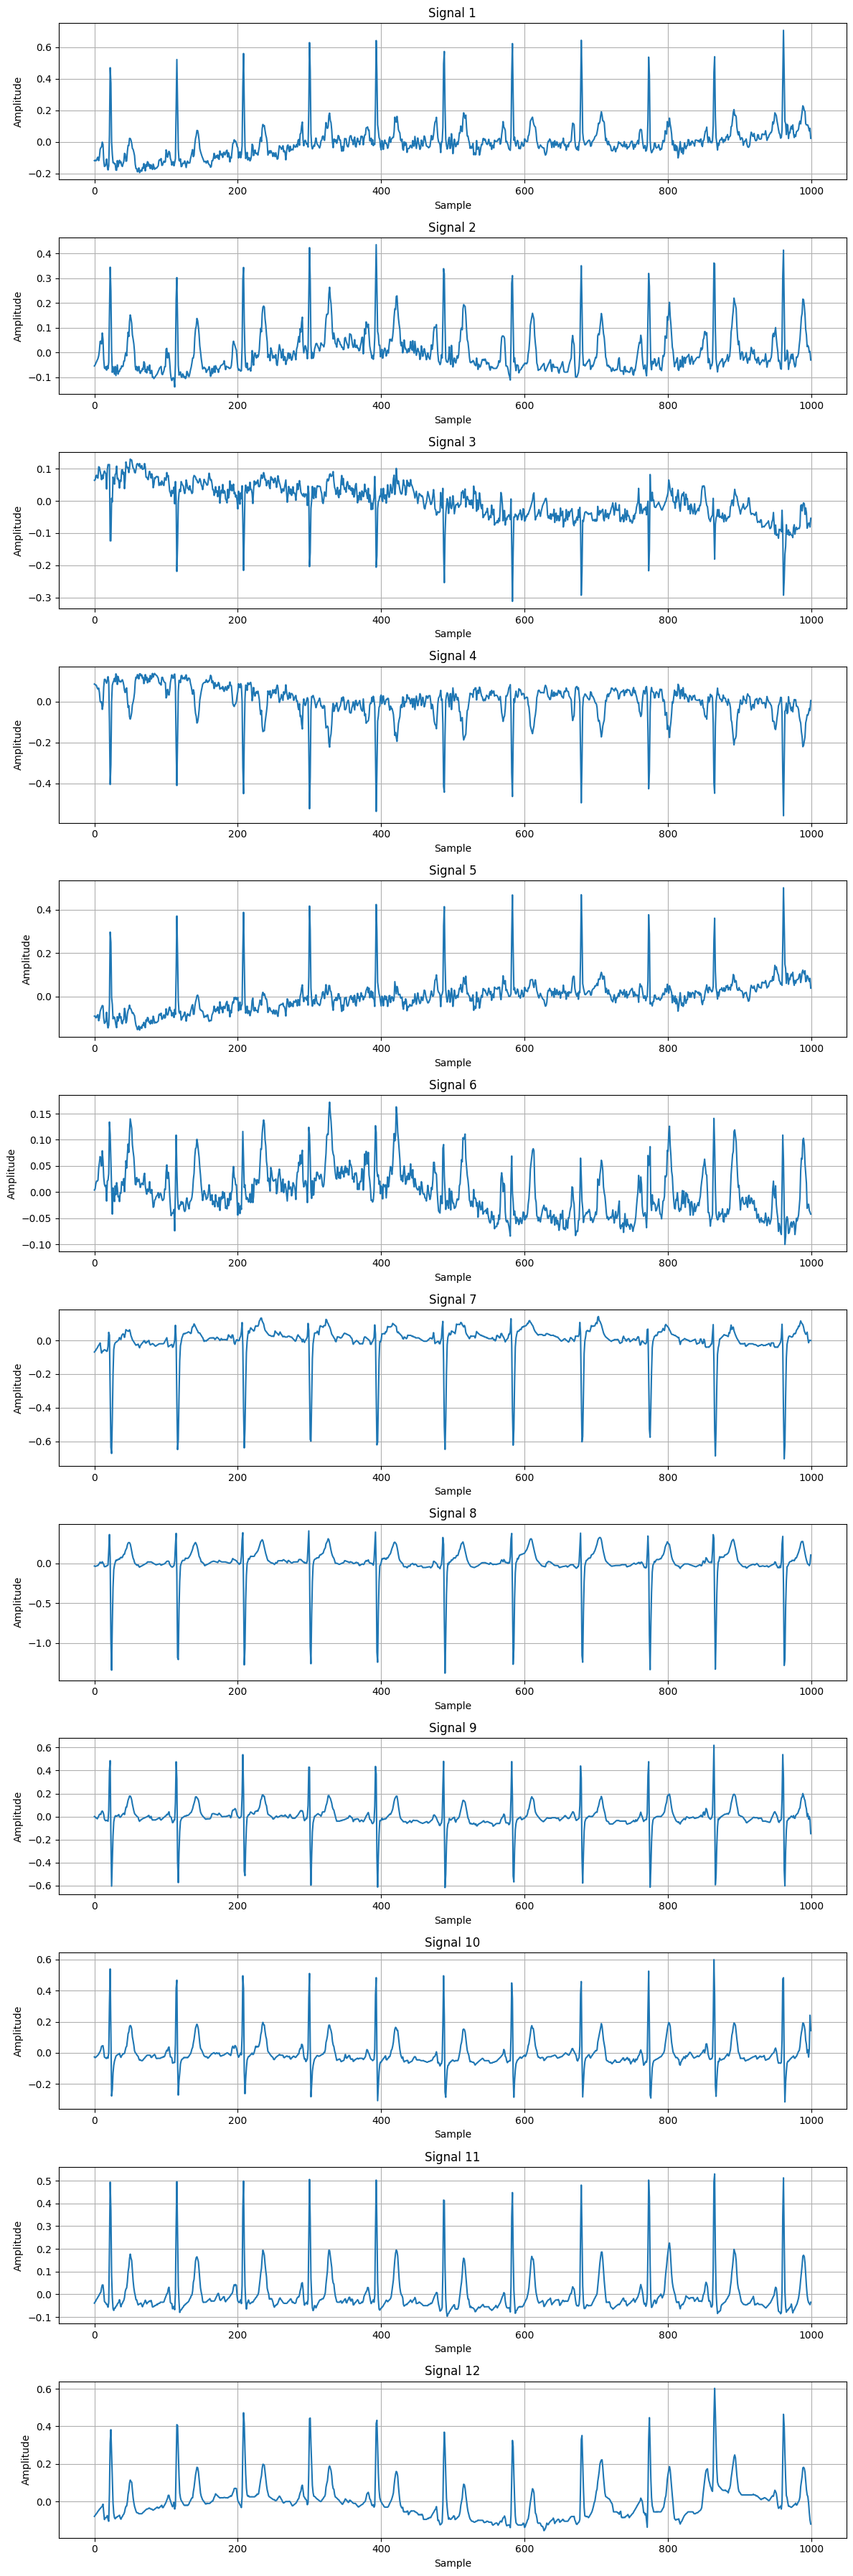

In [4]:
import matplotlib.pyplot as plt

# Select a sample
sample_index = 0  # Change this index to plot different samples
ecg_sample = X_train[sample_index]

# Plot each signal separately
num_signals = ecg_sample.shape[1]

plt.figure(figsize=(12, 3*num_signals))
for i in range(num_signals):
    plt.subplot(num_signals, 1, i+1)
    plt.plot(ecg_sample[:, i])
    plt.title(f'Signal {i+1}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()
